## Lab_imbalance

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [4]:
df=pd.read_csv('customer_churn.csv')
df.head(50)
#diabetes.Outcome.value_counts(dropna=False)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [5]:
list(df.columns)


['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [6]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df['SeniorCitizen']

0       0
1       0
2       0
3       0
4       0
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: SeniorCitizen, Length: 7043, dtype: int64

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [10]:
df.shape

(7043, 21)

In [11]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [12]:
#We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.

In [13]:
df['Churn']

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

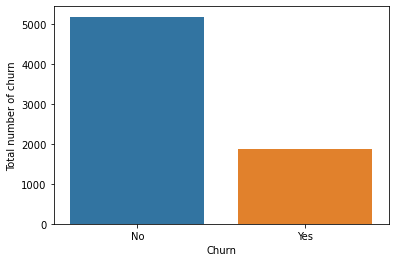

In [14]:
sns.countplot(x='Churn', data=df)
plt.ylabel('Total number of churn')
plt.show()

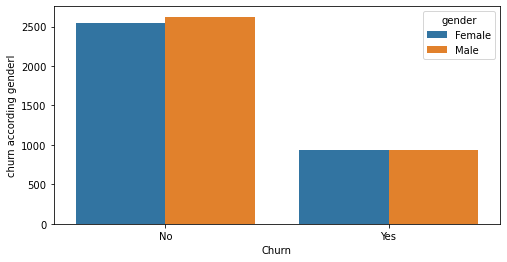

In [15]:
plt.figure(figsize=(8,4))
sns.countplot(x='Churn', hue='gender', data=df)
plt.ylabel('churn according genderl')
plt.show()

In [16]:
df['Churn'] = np.where(df.Churn=='Yes',1,0)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,1


In [17]:
# X/y split
X = df[['SeniorCitizen','tenure','MonthlyCharges']]
y = df['Churn']

In [18]:
X

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70
...,...,...,...
7038,0,24,84.80
7039,0,72,103.20
7040,0,11,29.60
7041,1,4,74.40


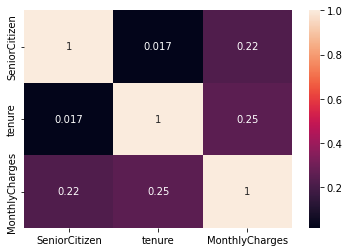

In [19]:
correlations_matrix = X.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [20]:
# here we start scaling, so need to do train-test-split before
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) # default fraction is .2

In [21]:
# all features are numeric, so no need to split into _num and _cat
transformer = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(transformer.transform(X_train),columns=X.columns)
# because this is the only tranformation we apply to the numerics, 
# we can immediately transform the X_test as well
X_test_scaled = pd.DataFrame(transformer.transform(X_test),columns=X.columns)
X_train_scaled.head()

,SeniorCitizen,tenure,MonthlyCharges
0,-0.435476,-0.340191,-0.514314
1,2.296336,0.883210,0.017840
2,-0.435476,-1.196572,-0.819594
3,-0.435476,1.168670,-1.483535
4,-0.435476,-0.829552,0.658427


In [22]:
y_train = y_train.reset_index(drop=True) 
# needed because the transformation also reset the index for X_train_scaled
# so we need this for y_test as well...
y_test = y_test.reset_index(drop=True) 

In [23]:
y_train.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int32

In [24]:
y_train.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int32

In [25]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_scaled, y_train)

LogisticRegression(random_state=0)

In [26]:
LR.predict_proba(X_train_scaled)

array([[0.83055757, 0.16944243],
       [0.88959148, 0.11040852],
       [0.66558189, 0.33441811],
       ...,
       [0.98794797, 0.01205203],
       [0.25884511, 0.74115489],
       [0.79626532, 0.20373468]])

In [27]:
logits = np.log(1/LR.predict_proba(X_train_scaled)[:,1]-1)

<AxesSubplot:>

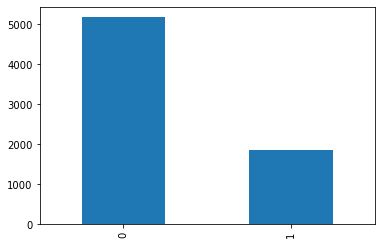

In [28]:
# while there are more imbalanced datasets, we have a significant imbalance
# and the cost of failing to detect the minority class is quite high (lack of diagnosis of diabetes)
count_classes = df['Churn'].value_counts()
count_classes
count_classes.plot(kind = 'bar')

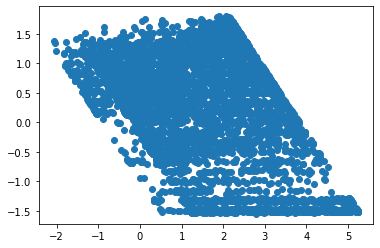

In [29]:
plt.scatter(logits,X_train_scaled['MonthlyCharges'])

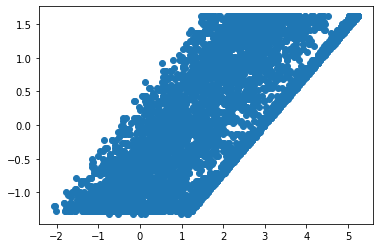

In [30]:
plt.scatter(logits,X_train_scaled['tenure'])

In [31]:
## A relatively model

In [32]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_scaled, y_train)
LR.score(X_test_scaled, y_test)

0.7808063600227144

In [33]:
#while accuracy is not absolutely terrible, a closer look reveals some serious problems
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

pred = LR.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))


precision:  0.6115942028985507
recall:  0.4557235421166307
f1:  0.5222772277227723


In [34]:
#we fail to identify 40%+ of diabetes cases!
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[1164,  134],
       [ 252,  211]], dtype=int64)

In [35]:
from sklearn.utils import resample

In [36]:
# oversampling / undersampling is only to be done on the TRAINING set
# our test set still must reflect reality!
train = pd.concat([X_train_scaled, y_train],axis=1)
train.head()

,SeniorCitizen,tenure,MonthlyCharges,Churn
0,-0.435476,-0.340191,-0.514314,0
1,2.296336,0.883210,0.017840,0
2,-0.435476,-1.196572,-0.819594,1
3,-0.435476,1.168670,-1.483535,0
4,-0.435476,-0.829552,0.658427,1


In [37]:
## Oversampling¶

In [38]:
# separate majority/minority classes
no_churn = train[train['Churn']==0]
yes_churn = train[train['Churn']==1]

In [39]:
display(no_churn.shape)
display(yes_churn.shape)

(3876, 4)

(1406, 4)

In [40]:
# oversample minority
yes_churn_oversampled = resample(yes_churn, #<- sample from here
                                    replace=True, #<- we need replacement, since we don't have enough data otherwise
                                    n_samples = len(no_churn),#<- make both sets the same size
                                    random_state=0)

In [41]:
# both sets are now of a reasonable size
display(no_churn.shape)
display(yes_churn_oversampled.shape)
yes_churn_oversampled.head(20)

(3876, 4)

(3876, 4)

,SeniorCitizen,tenure,MonthlyCharges,Churn
2453,-0.435476,-1.278132,0.156300,1
1976,-0.435476,-1.278132,1.168894,1
4528,-0.435476,-1.196572,-0.319135,1
3011,-0.435476,-1.278132,0.488271,1
2758,-0.435476,-1.155792,-1.460181,1
5202,-0.435476,1.168670,-1.511895,1
3763,2.296336,-0.666432,-0.857962,1
1033,-0.435476,-1.074232,-0.294112,1
2135,-0.435476,-0.340191,1.043780,1
4006,-0.435476,-1.155792,0.301433,1


In [42]:
train_oversampled = pd.concat([no_churn,yes_churn_oversampled],axis=0)
train_oversampled.head()

,SeniorCitizen,tenure,MonthlyCharges,Churn
0,-0.435476,-0.340191,-0.514314,0
1,2.296336,0.883210,0.017840,0
3,-0.435476,1.168670,-1.483535,0
5,-0.435476,1.046330,0.503285,0
6,-0.435476,-0.258631,0.701800,0


In [43]:
y_train_over = train_oversampled['Churn'].copy()
X_train_over = train_oversampled.drop('Churn',axis = 1).copy()

In [44]:
# Our Logistic Regression, while still not amazing, has improved substantially!
# especially at detecting instances of diabetes
LR_over = LogisticRegression(random_state=0, solver='lbfgs')
LR_over.fit(X_train_over, y_train_over)
pred = LR_over.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.4790764790764791
recall:  0.7170626349892009
f1:  0.57439446366782


In [45]:
confusion_matrix(y_test,pred)

array([[937, 361],
       [131, 332]], dtype=int64)

In [46]:
!pip install imblearn
from imblearn.over_sampling import SMOTE

You should consider upgrading via the 'C:\Users\Administrator\anaconda3\python.exe -m pip install --upgrade pip' command.


In [47]:
# a bit of magic, you can find documentation here: https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html
# by deafult, takes a 5-neighbour KNN to build a new point, experimenting led us to choose 3 here
sm = SMOTE(random_state=100, k_neighbors=3)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_scaled,y_train)

In [48]:
X_train_SMOTE.shape

(7752, 3)

In [49]:
# yet another small improvement, but bear in mind that we saved 12 hypothetical people with
# these "small improvements"
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_SMOTE, y_train_SMOTE)
pred = LR.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.4776978417266187
recall:  0.7170626349892009
f1:  0.5734024179620035


In [50]:
confusion_matrix(y_test,pred)

array([[935, 363],
       [131, 332]], dtype=int64)

In [51]:
# ###another way for encoding 
# from sklearn.preprocessing import LabelEncoder
# # Tranforming the sets of Labels into 0 and 1s so we can check the scores
# le = LabelEncoder()
# y_train_labeled = le.fit_transform(y_train)

# y_test_labeled = le.fit_transform(y_test)
# #y_test_labeled

In [53]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=100,k_neighbors=3)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_scaled,y_train)

In [54]:
class_smote = LogisticRegression(random_state=0,solver='lbfgs').fit(X_train_SMOTE,y_train_SMOTE)
class_smote.score(X_test_scaled, y_test)

0.7194775695627484

In [55]:
pred_smote = class_smote.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred_smote))
print("recall: ",recall_score(y_test,pred_smote))
print("f1: ",f1_score(y_test,pred_smote))

precision:  0.4776978417266187
recall:  0.7170626349892009
f1:  0.5734024179620035


In [56]:
pred_smote

array([0, 0, 1, ..., 0, 0, 0])

In [57]:
confusion_matrix(y_test,pred_smote)

array([[935, 363],
       [131, 332]], dtype=int64)